In [48]:
# -*- coding: utf-8 -*-
import re
import time
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from datetime import timedelta
from datetime import datetime as dt

amedas_url_list = pd.read_csv('amedas_url_list.csv',encoding='SJIS')
df = amedas_url_list[amedas_url_list['station']=='稚内']
amedas_url = df.iat[0,2]

pattern=r'([+-]?[0-9]+\.?[0-9]*)'
id_list=re.findall(pattern, amedas_url)

In [96]:
from dateutil.relativedelta import relativedelta
strdt = dt.strptime('201901', '%Y%m')
enddt = dt.strptime('201902', '%Y%m')
months_num = (enddt.year - strdt.year)*12 + enddt.month - strdt.month + 1

monthlist = map(lambda x, y=strdt: y + relativedelta(months=x), range(months_num))

In [97]:
for dt in monthlist:
    d = dt.strftime("%Y%m%d")
    print(d)

20190101
20190201


In [50]:
data = pd.DataFrame(columns=['日付','時分','現地気圧','海面気圧','降水量','気温','相対湿度','平均風速','平均風向','最大瞬間風速','最大瞬間風向','日照時間'])
for dt in datelist:
    d = dt.strftime("%Y%m%d")
    yyyy = d[0:4]
    mm = d[4:6]
    dd = d[6:8]
    url = f'https://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no={id_list[0]}&block_no={id_list[1]}&year={yyyy}&month={mm}&day={dd}&view=p1'
    time.sleep(1)
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    element = soup.find_all('tr', attrs={'class':'mtx', 'style':'text-align:right;'})
    out = [list(map(lambda x: x.text, ele)) for ele in element]

    date = np.full([144,1], f'{yyyy}{mm}{dd}')
    date = pd.DataFrame(date,columns=['日付'])
    df = pd.DataFrame(data=out, columns=['時分','現地気圧','海面気圧','降水量','気温','相対湿度','平均風速','平均風向','最大瞬間風速','最大瞬間風向','日照時間'])
    df = pd.concat([date, df],axis=1)
    data = pd.concat([data, df])
    print(f'稚内_{yyyy}-{mm}-{dd}')
data.to_csv(f'稚内_{startdate}-{enddate}.csv', index=None, encoding='SJIS')

稚内_2019-01-01
稚内_2019-01-02
稚内_2019-01-03
稚内_2019-01-04
稚内_2019-01-05
稚内_2019-01-06
稚内_2019-01-07
稚内_2019-01-08
稚内_2019-01-09
稚内_2019-01-10


In [64]:
yyyy = '2019'
mm = '01'
dd = '01'
url = f'https://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year={yyyy}&month={mm}&day={dd}&view=p1'
time.sleep(1)
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
element = soup.find_all('tr', attrs={'class':'mtx', 'style':'text-align:right;'})
out = [list(map(lambda x: x.text, ele)) for ele in element]

In [2]:
import pandas as pd
df = pd.read_csv('amedas_url_list.csv', encoding='SJIS')
df

,area,station,amedas_url
0,宗谷地方,稚内,https://www.data.jma.go.jp/obd/stats/etrn/inde...
1,宗谷地方,沓形,https://www.data.jma.go.jp/obd/stats/etrn/inde...
2,宗谷地方,浜頓別,https://www.data.jma.go.jp/obd/stats/etrn/inde...
3,宗谷地方,北見枝幸,https://www.data.jma.go.jp/obd/stats/etrn/inde...
4,宗谷地方,歌登,https://www.data.jma.go.jp/obd/stats/etrn/inde...
...,...,...,...
2005,沖縄県,沖縄県全地点,https://www.data.jma.go.jp/obd/stats/etrn/inde...
2006,沖縄県,宮城島,https://www.data.jma.go.jp/obd/stats/etrn/inde...
2007,沖縄県,盛山,https://www.data.jma.go.jp/obd/stats/etrn/inde...
2008,沖縄県,渡名喜,https://www.data.jma.go.jp/obd/stats/etrn/inde...


In [3]:
import pandas as pd
from pandasql import sqldf

df = pd.read_csv('東京都_東京_20190401-20190731_10min.csv',encoding='SJIS')

In [4]:
df

,日付,時分,現地気圧,海面気圧,降水量,気温,相対湿度,平均風速,平均風向,最大瞬間風速,最大瞬間風向,日照時間
0,20190401,0:10,1008.2,1011.2,--,8.4,56,4.4,北北西,7.2,北西,NaN
1,20190401,0:20,1008.1,1011.1,--,8,57,3.4,北北西,6.3,西北西,NaN
2,20190401,0:30,1008.3,1011.3,--,8.2,56,2.8,北北西,6.7,北西,NaN
3,20190401,0:40,1008.4,1011.4,--,8,57,2.8,北北西,6.3,北西,NaN
4,20190401,0:50,1008.5,1011.5,--,8.2,55,2.9,北北西,7,北北西,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17563,20190731,23:20,1008.9,1011.6,--,27.6,92,1.8,南南東,2.6,南南東,NaN
17564,20190731,23:30,1008.9,1011.6,--,27.3,94,1.4,南南東,2.7,南東,NaN
17565,20190731,23:40,1008.9,1011.7,--,27.1,95,1.2,南南東,2,南東,NaN
17566,20190731,23:50,1008.8,1011.6,--,27.1,96,1.3,南南東,1.9,南東,NaN


In [7]:
q = """
    select 
        ,avg(気温)
    from df
    group by 平均風向;
    """

a = sqldf(q,locals())

In [8]:
a

,平均風向,count(*)
0,×,7
1,北,930
2,北北東,1126
3,北北西,1582
4,北東,1174
5,北西,1136
6,南,2440
7,南南東,3102
8,南南西,939
9,南東,1736


In [34]:
import pandas as pd

df = pd.read_csv('茨城県_つくば（館野）_20191203-20191204_10min.csv',encoding='SJIS')
df

,日付,時分,気温,相対湿度,平均風速
0,20191203,21:00,8.9,64,1.9
1,20191203,21:10,8.9,63,1.8
2,20191203,21:20,7.8,69,1.6
3,20191203,21:30,7.4,73,1.4
4,20191203,21:40,6.8,77,1.5
5,20191203,21:50,6.7,77,0.8
6,20191203,22:00,6.7,77,0.2
7,20191203,22:10,6.1,80,0.9
8,20191203,22:20,5.6,86,1.1
9,20191203,22:30,5.3,85,0.7


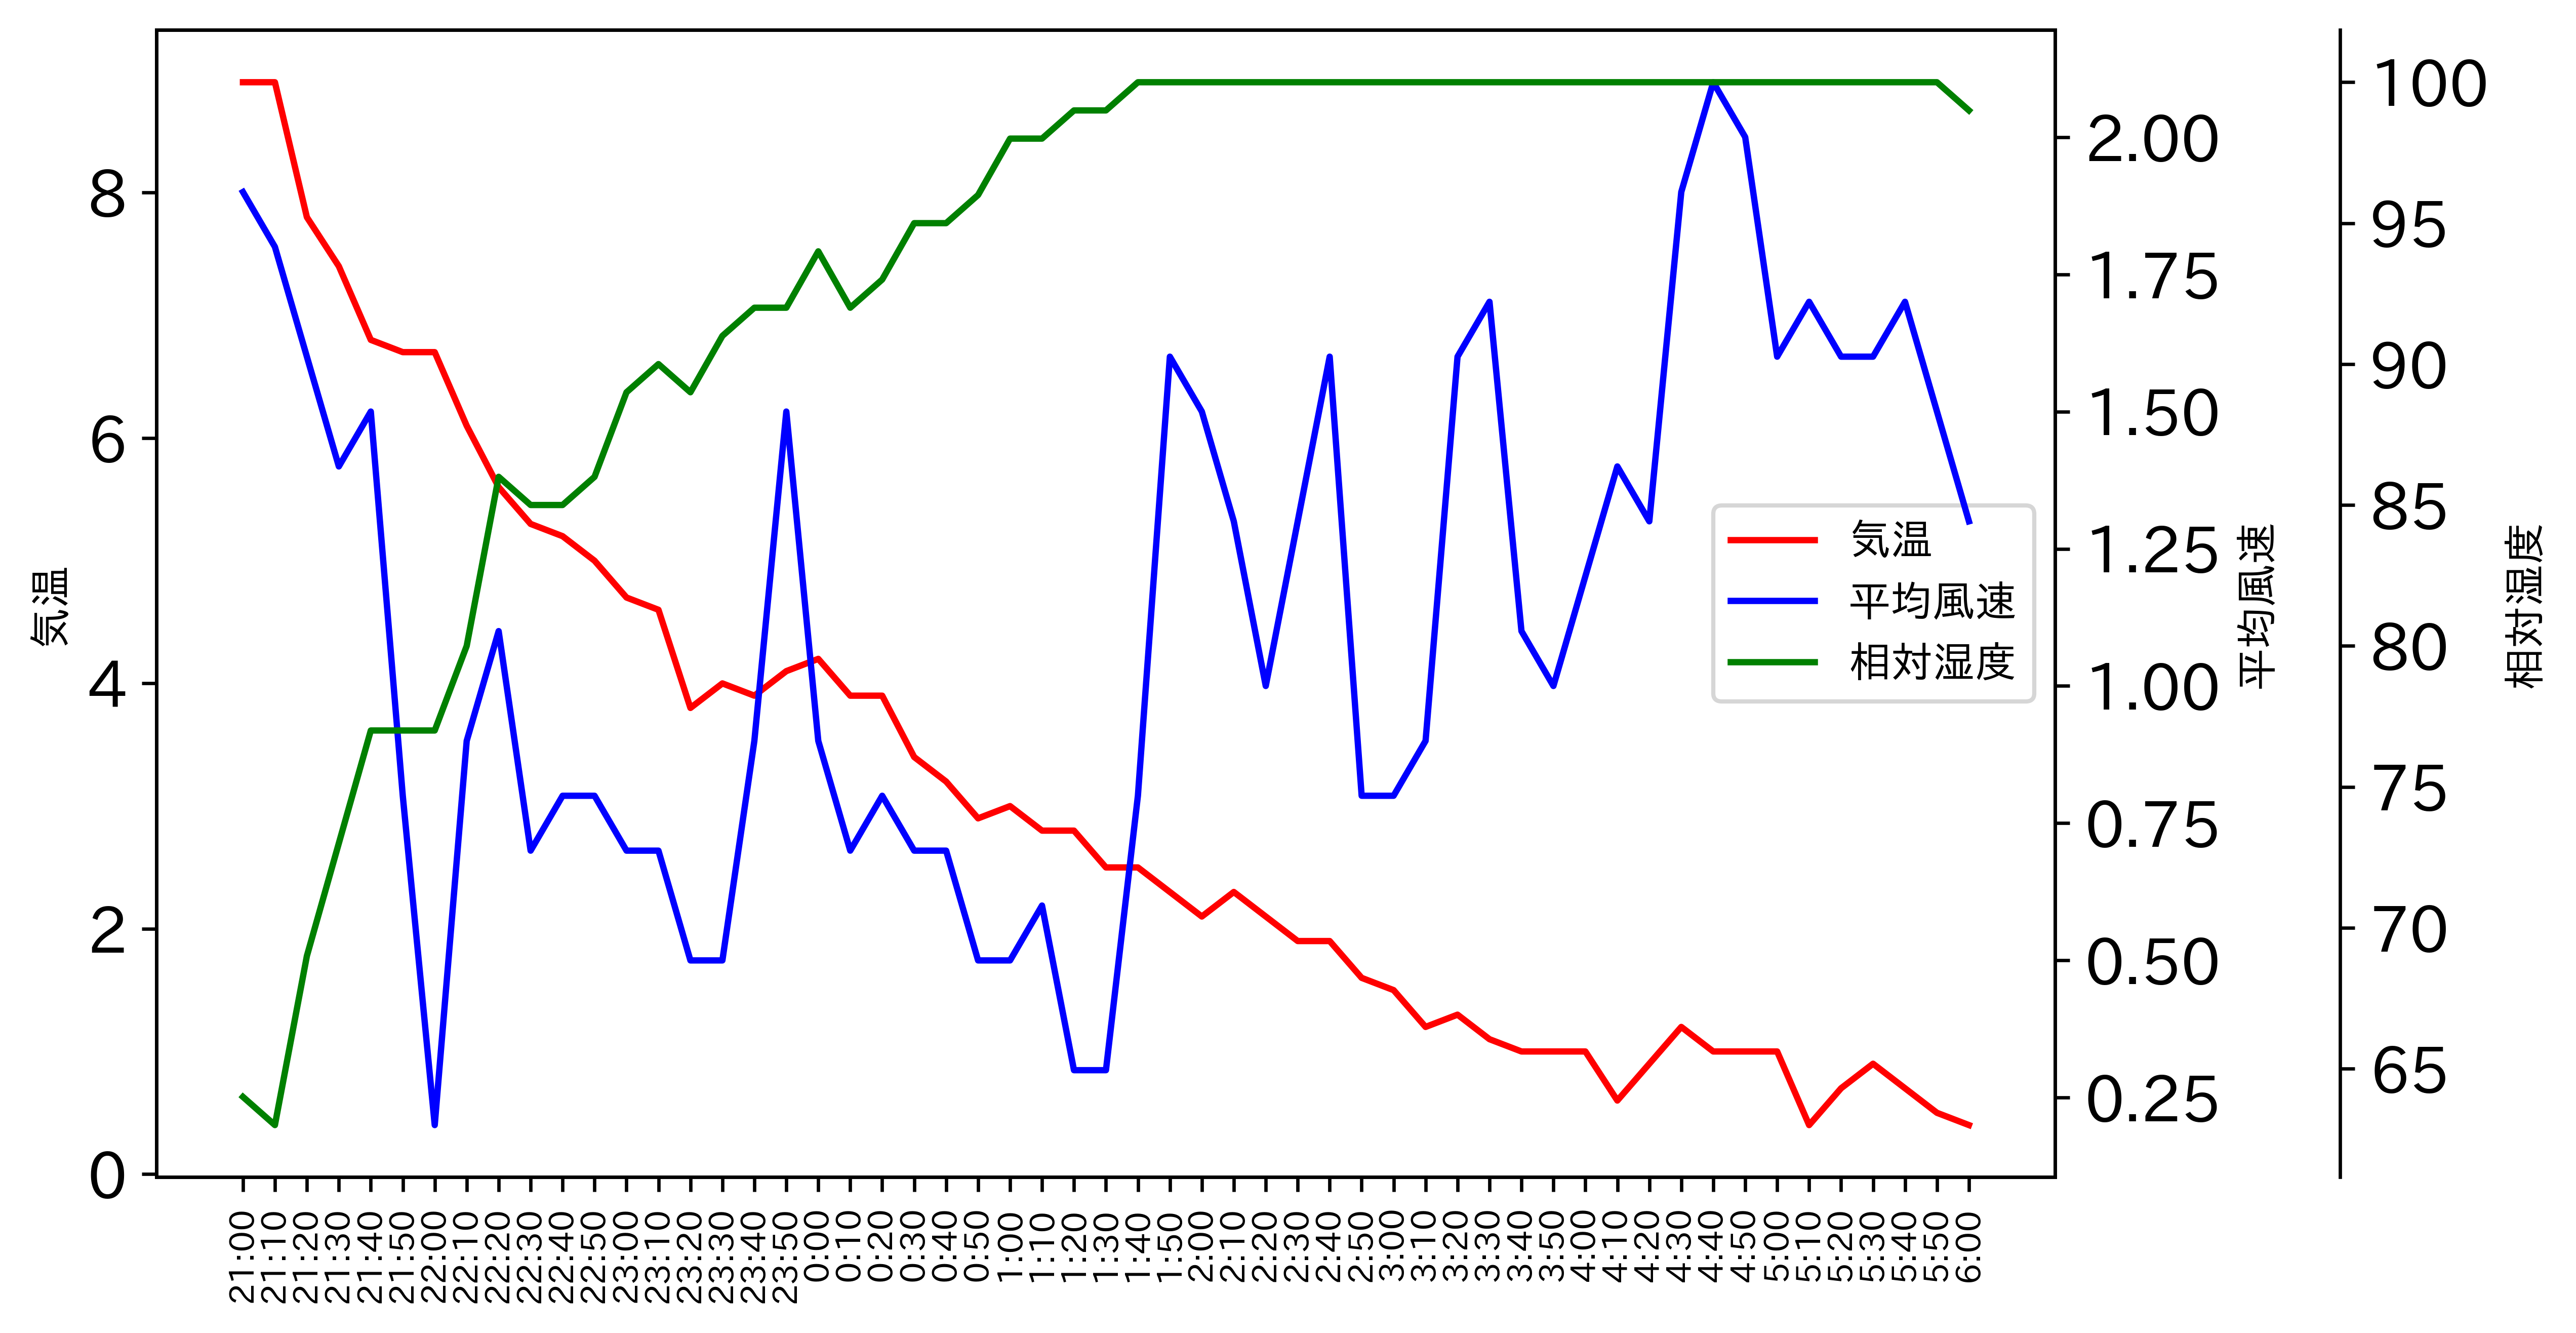

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,5),dpi=600)
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=8)

a0 = fig.gca()
a1 = a0.twinx()
a2 = a0.twinx()

fig.subplots_adjust(right=0.75)
a2.spines['right'].set_position(('axes', 1.15))
a2.set_frame_on(True)
a2.patch.set_visible(False)
a1.spines['right'].set_position(('axes',1))

a0.set_ylabel("気温")
a0.plot(df['時分'],df['気温'],"r-",label="気温")
a0.tick_params(axis='y', which='major', labelsize=15)

a1.set_ylabel("平均風速")
a1.plot(df['時分'],df['平均風速'],"b-", label="平均風速")
a1.tick_params(axis='y', which='major', labelsize=15)

a2.set_ylabel("相対湿度")
a2.plot(df['時分'],df['相対湿度'],"g-",label="相対湿度")
a2.tick_params(axis='y', which='major', labelsize=15)

h0, l0 = a0.get_legend_handles_labels()
h1, l1 = a1.get_legend_handles_labels()
h2, l2 = a2.get_legend_handles_labels()

a0.legend(h0+h1+h2, l0+l1+l2,  loc='center right')